In [29]:
pip install umap-learn

  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.12-py3-none-any.whl.metadata (6.8 kB)
Using cached umap_learn-0.5.6-py3-none-any.whl (85 kB)
Using cached pynndescent-0.5.12-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [30]:
#Librerias

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [32]:
data_pca = pd.read_csv("subsampled_E10-E14_pca.csv")
data_tsne = pd.read_csv("subsampled_complete_1y_E10-E14_tsne2d.csv")
data_umap = pd.read_csv("subsampled_complete_1y_E10-E14_umap2d.csv")

In [35]:
modelo = KMeans(n_clusters=12, random_state=42)

In [36]:
def plot_pca(modelo, data_pca):
    pca_embedding_ij = PCA(n_components=2).fit_transform(data_pca[['pca_0','pca_1']])

    cluster_labels = modelo.fit_predict(pca_embedding_ij)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_embedding_ij[:, 0], pca_embedding_ij[:, 1], c=cluster_labels, s=10, cmap='viridis')
    plt.title('PCA Embedding (pca_0 vs pca_1)')
    plt.xlabel('PCA Component 0')
    plt.ylabel('PCA Component 1')
    plt.colorbar(label='Cluster')
    plt.show()

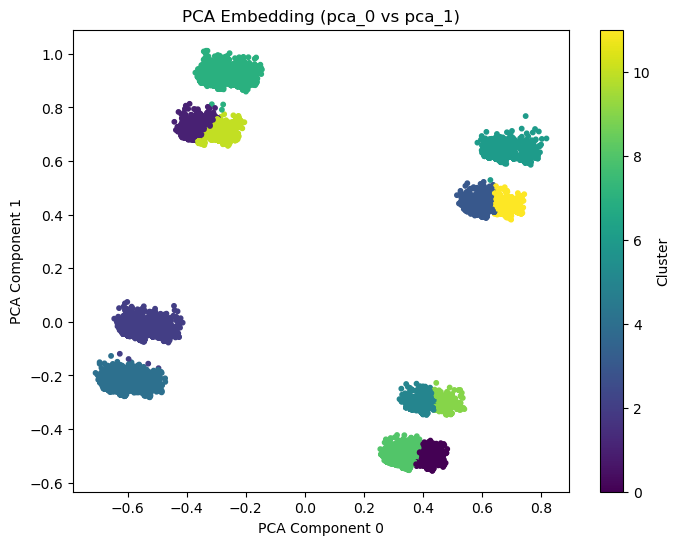

In [37]:
plot_pca(modelo, data_pca)

In [38]:
def plot_tsne(modelo, data_tsne):
    tsne_embedding_ij = TSNE(n_components=2, random_state=0).fit_transform(data_tsne[['tsne2d_0','tsne2d_1']])

    cluster_labels = modelo.fit_predict(tsne_embedding_ij)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_embedding_ij[:, 0], tsne_embedding_ij[:, 1], c=cluster_labels, s=10, cmap='viridis')
    plt.title('t-SNE Embedding (2D)')
    plt.xlabel('t-SNE Component 0')
    plt.ylabel('t-SNE Component 1')
    plt.colorbar(label='Cluster')
    plt.show()

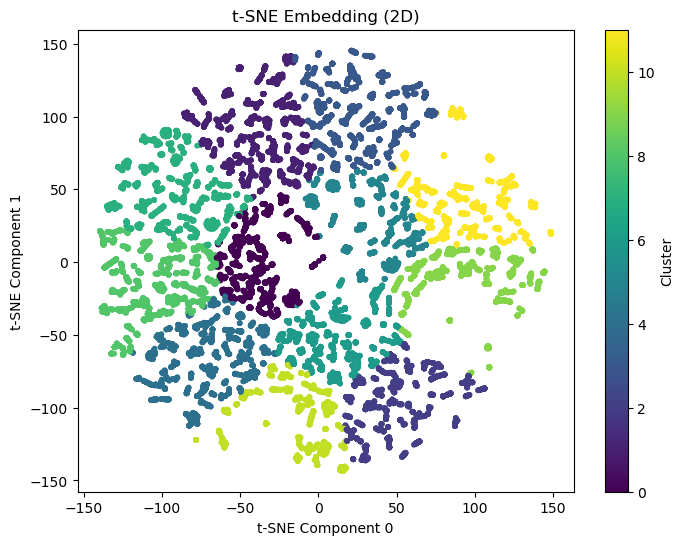

In [39]:
plot_tsne(modelo, data_tsne)

In [40]:

def plot_umap(modelo, data_umap):
    umap_embedding_ij = umap.UMAP(n_components=2, random_state=0).fit_transform(data_umap[['umap2d_0','umap2d_1']])

    cluster_labels = modelo.fit_predict(umap_embedding_ij)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(umap_embedding_ij[:, 0], umap_embedding_ij[:, 1], c=cluster_labels, s=10, cmap='viridis')
    plt.title('UMAP Embedding (2D)')
    plt.xlabel('UMAP Component 0')
    plt.ylabel('UMAP Component 1')
    plt.colorbar(label='Cluster')
    plt.show()

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


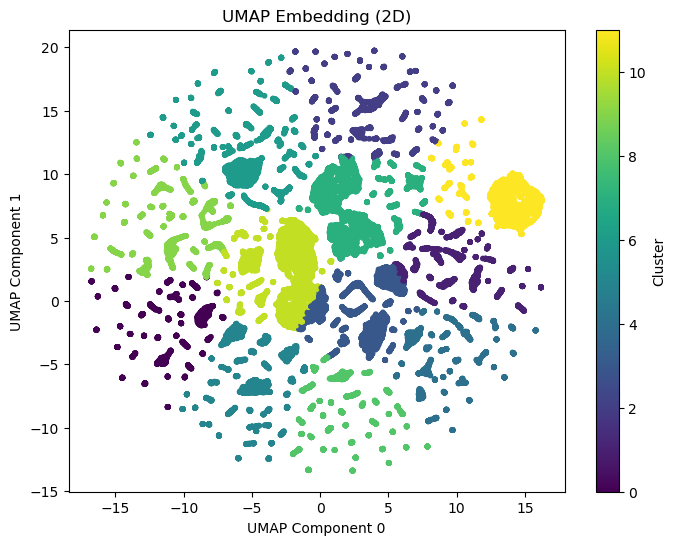

In [41]:
plot_umap(modelo, data_umap)